<a href="https://colab.research.google.com/github/Sandy-exe/SLAM/blob/master/task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounted at /content/drive
1/1 [==============================] - 1s 585ms/step
[[3296.32719857 3372.35437047 3442.37781192 3510.0407405  3698.18482502]]
[[0 3 4 1 2]]


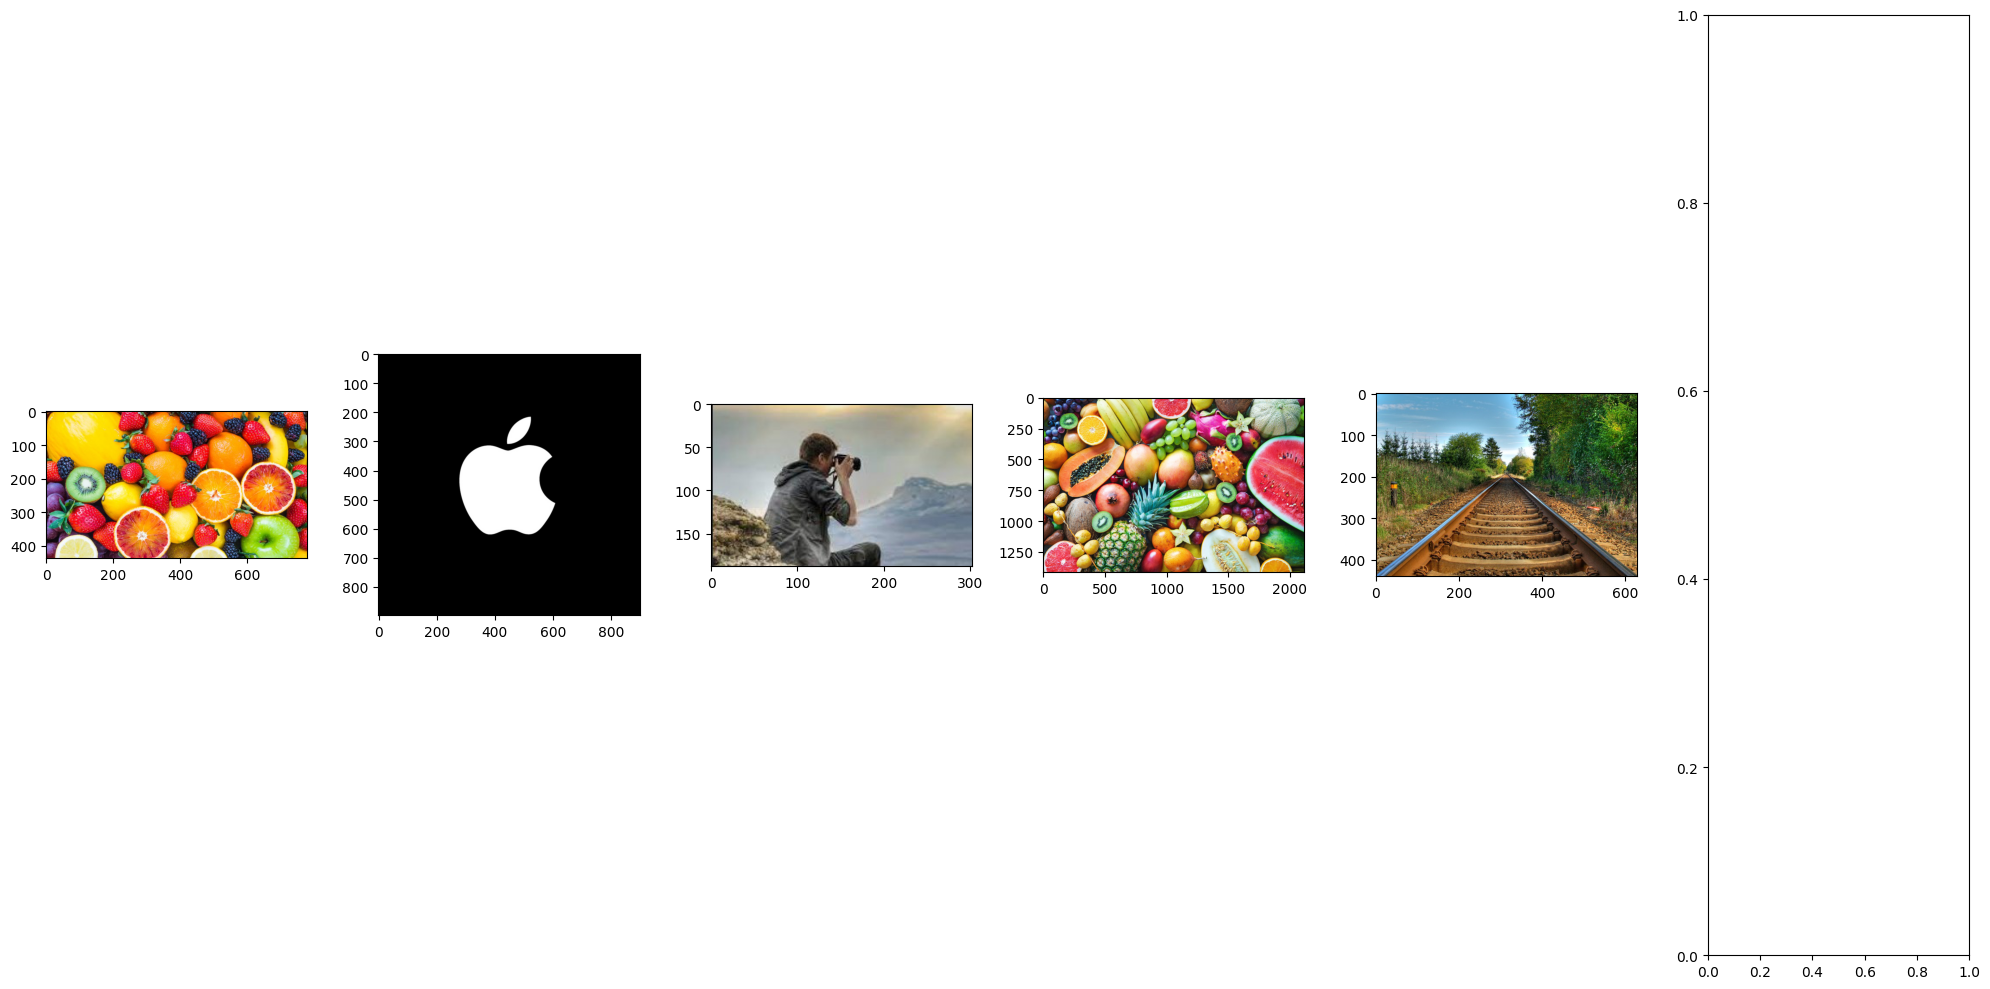

In [1]:
#task2
from google.colab import drive
drive.mount('/content/drive')


import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input
from sklearn.neighbors import NearestNeighbors
from PIL import Image


# Load the query image from Google Drive
query_image = '/content/drive/MyDrive/Reverse/query.jpg'

# Load the database images from Google Drive
image_paths = ['/content/drive/MyDrive/Reverse/image1.jpg',
               '/content/drive/MyDrive/Reverse/image2.jpg',
               '/content/drive/MyDrive/Reverse/image3.jpg',
               '/content/drive/MyDrive/Reverse/image4.jpg',
               '/content/drive/MyDrive/Reverse/image5.jpg']
# Load the pre-trained VGG16 model
model = tf.keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Load a set of images into a list
images = []

for path in image_paths:
    img = load_img(path, target_size=(224, 224))
    img = img_to_array(img)
    img = preprocess_input(img)
    images.append(img)

images = np.array(images)
# Extract features from vgg16
features = model.predict(images)

#print(len(features[0]),len(features[0][0]),len(features[0][0][0]))
# KNN
nn_model = NearestNeighbors(n_neighbors=5, algorithm='auto')
nn_model.fit(features.reshape(len(features), -1))
query = []
img = load_img(query_image, target_size=(224, 224))
img = img_to_array(img)
img = preprocess_input(img)
query.append(img)

query = np.array(query)


query_features = model.predict(query)

distances, indices = nn_model.kneighbors(query_features.reshape(1, -1))
print(distances)
print(indices)
#plots
fig, ax = plt.subplots(nrows=1, ncols=6, figsize=(20, 10))

for i, index in enumerate(indices[0]):
    img = load_img(image_paths[index])
    ax[i].imshow(img)

plt.tight_layout()
plt.show()
